<h1><center>DS200 - Lab 5: Network Intrusion Detection with K-Means Clustering</center></h1>

## Introduction

In this lab, you will be using the DARPA KDD 99 dataset with KMeans clustering.

The complete description of the dataset can be found [here](http://kdd.ics.uci.edu/databases/kddcup99/task.html).

Software to detect network intrusions protects a computer network from unauthorized users, including perhaps insiders. The intrusion detector learning task is to build a predictive model (i.e. a classifier) capable of distinguishing between **bad** connections, called intrusions or attacks, and **good** normal connections.

Each data record in this dataset is a connection, which is a sequence of TCP packets starting and ending at some well defined times, between which data flows to and from a source IP address to a target IP address under some well defined protocol. 

**Each connection is labeled as either `normal`, or as an `attack`, with exactly one specific attack type.**

Each connection record consists of about 100 bytes.

Attacks fall into four main categories:

+ DOS: denial-of-service, e.g. syn flood;
+ R2L: unauthorized access from a remote machine, e.g. guessing password;
+ U2R: unauthorized access to local superuser (root) privileges, e.g., various "buffer overflow" attacks;
+ Probing: surveillance and other probing, e.g., port scanning.

___

## Section 1: Import Libraries and Load the Data

#### Q1: Import all the necessary libraries. Hold on to sklearn related libraries for now - we will import them when we use them. 

In [175]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Then, read the dataset from the given URL into a DataFrame named `kdd`.

In [176]:
URL = 'https://raw.githubusercontent.com/BlueJayADAL/DS200/master/datasets/kdd99.csv '

In [177]:
kdd = pd.read_csv(URL)



#### Q2. Check the first 5 rows from the DataFrame, show the statistics information, show the column data types, and find the missing data. 

Display the top 5 rows.

In [178]:
kdd.head()



,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,private,S0,0,0,0,0,0,0,...,6,0.02,0.08,0.0,0.0,1.0,1.0,0.0,0.0,neptune.
1,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.00,0.00,1.0,0.0,0.0,0.0,0.0,0.0,smurf.
2,0,tcp,private,S0,0,0,0,0,0,0,...,4,0.02,0.06,0.0,0.0,1.0,1.0,0.0,0.0,neptune.
3,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.00,0.00,1.0,0.0,0.0,0.0,0.0,0.0,smurf.
4,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.00,0.00,1.0,0.0,0.0,0.0,0.0,0.0,smurf.


Show the basic statistics

In [179]:
kdd.describe()



,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,255975.000000,2.559750e+05,2.559750e+05,255975.000000,255975.000000,255975.000000,255975.000000,255975.000000,255975.000000,255975.000000,...,255975.000000,255975.000000,255975.000000,255975.000000,255975.000000,255975.000000,255975.000000,255975.000000,255975.000000,255975.000000
mean,86.498635,1.580102e+03,1.420789e+03,0.000051,0.005083,0.000016,0.037031,0.000191,0.278371,0.014505,...,213.323305,191.783217,0.774898,0.036689,0.495535,0.010671,0.136626,0.136140,0.058023,0.057031
std,898.699581,5.686982e+04,3.257657e+04,0.007126,0.120038,0.006250,0.801153,0.019060,0.448198,2.496829,...,83.162540,102.107223,0.390879,0.129130,0.485126,0.044630,0.342297,0.342422,0.229294,0.227575
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.050000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,117.000000,0.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.560000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.000000,0.270000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.032000e+03,2.890000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.020000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,58329.000000,5.135678e+06,5.151049e+06,1.000000,3.000000,3.000000,30.000000,5.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Find the column information.

In [180]:
kdd.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255975 entries, 0 to 255974
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     255975 non-null  int64  
 1   protocol_type                255975 non-null  object 
 2   service                      255975 non-null  object 
 3   flag                         255975 non-null  object 
 4   src_bytes                    255975 non-null  int64  
 5   dst_bytes                    255975 non-null  int64  
 6   land                         255975 non-null  int64  
 7   wrong_fragment               255975 non-null  int64  
 8   urgent                       255975 non-null  int64  
 9   hot                          255975 non-null  int64  
 10  num_failed_logins            255975 non-null  int64  
 11  logged_in                    255975 non-null  int64  
 12  num_compromised              255975 non-null  int64  
 13 

## Section 2: Exploratory Data Analysis

#### Q3: Let's first study the `label` column using Seaborn. Find the count for each label category.

<AxesSubplot:xlabel='label', ylabel='count'>

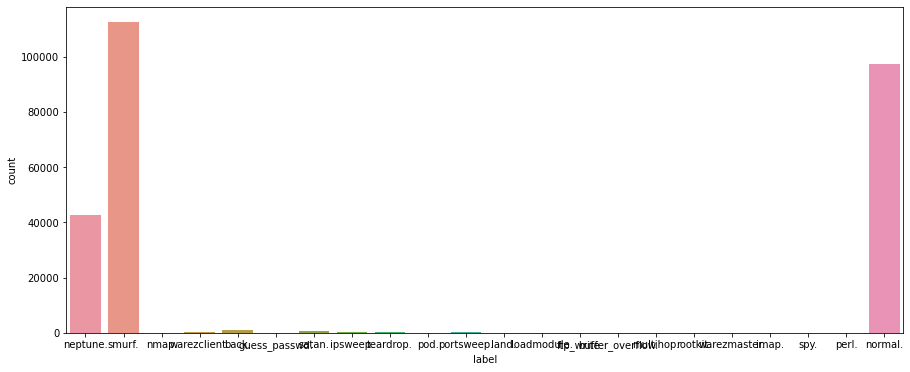

In [181]:
plt.figure(figsize=(15,6))
sns.countplot(data=kdd, x='label')




#### Well, not very readable on the x-axis, let's just count the occurrences for each category.

In [182]:
kdd['label'].value_counts()



smurf.              112387
normal.              97278
neptune.             42799
back.                  879
satan.                 636
ipsweep.               502
portsweep.             416
warezclient.           402
teardrop.              402
pod.                   103
nmap.                   84
guess_passwd.           28
buffer_overflow.        12
land.                   12
warezmaster.             8
imap.                    7
loadmodule.              6
ftp_write.               5
multihop.                3
rootkit.                 3
perl.                    2
spy.                     1
Name: label, dtype: int64

#### Q4: With the the 4 columns: `num_failed_logins`, `logged_in`, `num_compromised`, and `su_attempted`, let's create a pairplot to study the data distribution. It may take a while for your computer to plot. (4')

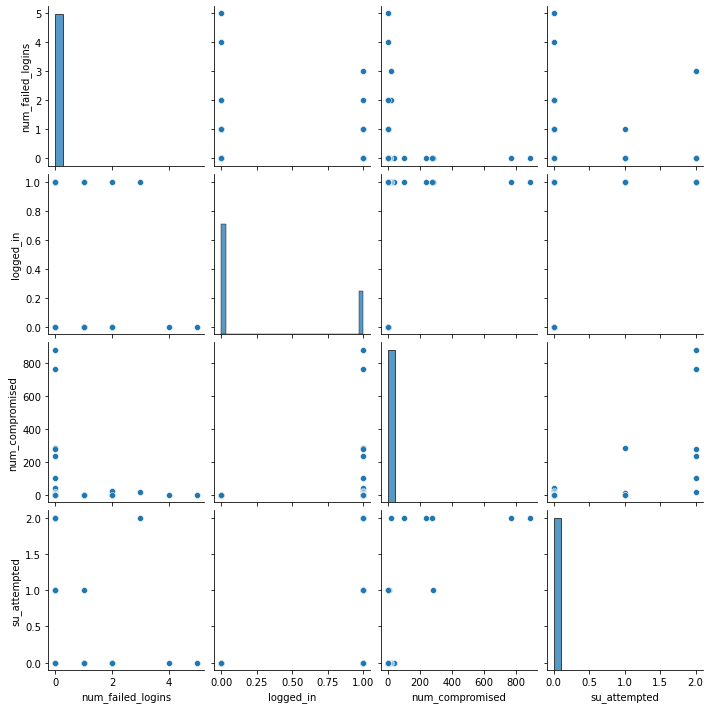

In [183]:
sns.pairplot(data=kdd[['num_failed_logins', 'logged_in', 'num_compromised', 'su_attempted']])



## Section 3: Data Cleaning and Transformation

#### Q5: It seems like we have 22 different categories of labels - one of them is the `normal.` label and the rest of them are 21 types of attacks. To formulate a binary clustering problem, let's take labels that are not `normal.`  as attacks.

Create a function `convert_labels()` to help transform the `label` column from the DataFrame. The normal traffic (named `normal.`) will be converted to 0, and the attack traffic (named anything other than `normal.`) will be coverted to 1. 

In [184]:
def convert_labels (label):
    '''
    Convert the label string to a numeric number:
    0 for normal, and 1 for attacks
    '''
    
    clean = 'normal.'
    if label == clean:
        return 0
    else: 
        return 1
    
    

In [185]:
# Overwrite the original 'label' column with the converted series
kdd['label'] = kdd['label'].apply(convert_labels)



#### Let's count the occurrences for each category from the `label` column again after the transformation.

In [186]:
kdd['label'].value_counts()



1    158697
0     97278
Name: label, dtype: int64

#### Q6: After the conversion, the dataset looks imbalanced. Let's balance it out by down-sampling the 'majority' group (label 1). 

First, separate the minority and majority classes into two DataFrames with boolean selection.

In [187]:
kdd_attack = kdd[kdd['label']==1]


# Show the number of rows
len(kdd_attack)

158697

In [188]:
kdd_normal = kdd[kdd['label']==0]

# Show the number of rows
len(kdd_normal)

97278

In [189]:
imbalance_ratio = len(kdd_attack) / len(kdd_normal)

imbalance_ratio

1.6313760562511566

Next, we'll sample the majority DataFrame `kdd_attack` by using the `.sample()` method ([Ref](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sample.html)). You need to carefully set the fraction argument `frac` based off of the imbalanced ratio, and set the random seed to `101`.

In [190]:
kdd_attack_downsampled = kdd_attack.sample(frac= 1/imbalance_ratio, random_state=101)



# Show the number of rows after downsampling
len(kdd_attack_downsampled)

97278

Finally, we'll combine the down-sampled DataFrame `kdd_attack_downsampled` with the DataFrame `kdd_normal`.

In [191]:
kdd_downsampled = pd.concat([kdd_attack_downsampled, kdd_normal])



Check if down-sampling works. 

In [192]:
kdd_downsampled['label'].value_counts()

1    97278
0    97278
Name: label, dtype: int64

## Section 4: Model Training and Predicting

#### Q7: originally we have 41 features from the DataFrame, but after careful feature engineering, we decide to use just a subset of them. Given the feature column names provided below for model training. 

Given the feature columns down below:

In [193]:
# Our chosen feature column names.
features = ['src_bytes', 'dst_bytes', 'num_failed_logins', 'logged_in', 'num_compromised', 
            'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 
            'num_access_files', 'num_outbound_cmds']


Grab a subset of DataFrame and use it as the X matrix. Also generate the y vector.

In [194]:
## Grab those columns from the DataFrame
X = kdd_downsampled[features]



## In reality, you won't have y labels
y = kdd_downsampled['label']



To avoid some features on wacky scales dominate the others, we need to scale all of them. In the KNN lecture, we use the StandardScaler. However, StandardScaler cannot guarantee balanced feature scales in the presence of outliers. Try to use the MinMaxScaler ([link](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)) this time because it is very sensitive to the presence of outliers.

In [195]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()


In [196]:



X_scaled = scaler.fit_transform(X)


In [197]:
X_scaled

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.00947178e-04, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.00947178e-04, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [3.95274003e-05, 2.32967277e-04, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [5.66624309e-05, 2.32967277e-04, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.26428604e-05, 2.39568017e-04, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

#### Q8: Assume we don't know the presence of the two label clusters (0 - normal; 1 - attack), let's use the elbow method to study the optimal K for a KMeans model.

Import the correct model from sklearn

In [198]:
from sklearn.cluster import KMeans


Use elbow method here to study the "sum of squared error" (SSE) for each model. The range of K you should study is from 1 to 5 (all inclusive)

In [199]:
sse = []

for i in range(1,6):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)



#### Q9: Let's plot out the 'SSE's against all K values as the figure shown below. Try your best to resemble the figure as shown.

Text(0, 0.5, 'SSE')

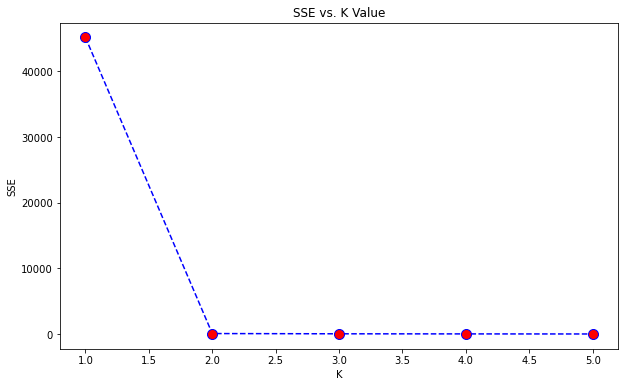

In [200]:
plt.figure(figsize=(10,6))

plt.plot(range(1,6),sse,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)

plt.title('SSE vs. K Value')
plt.xlabel('K')
plt.ylabel('SSE')

#### It seem likes we can observe a clear elbow. Use the optimal K you got from the elbow curve to retrain the KMeans model. Plot out the count of the predicted labels. (10')

C:\Users\augus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

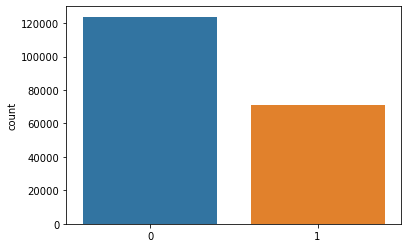

In [215]:
kmeans = KMeans(n_clusters=2)
kmeans.fit_predict(X_scaled)
sns.countplot(kmeans.predict(X_scaled))




## Section 5: Model Performance Evaluation

#### Q10: Remember, there is no perfect way to evaluate clustering if you don't have the labels. However because the labels are present in this dataset,  we can take advantage of them to evaluate our clusters. 

Because KMeans knows nothing about the identity of the cluster, the predicted 0,1 labels may be permuted (you don't know whether 0 means 'normal' or 'attack'). We can actually fix this by matching each learned cluster label with the true labels found in them.

Firstly, create a new numpy array called 'labels' to hold the fixed labels. You may want to make it the same shape of the 'label' column from our DataFrame.

In [172]:
labels = np.zeros_like(kmeans.labels_)



Secondly, knowing that `mode()` function from `scipy.stat` means the value that appears most often in a set. Thus, the "true" label that matches the cluster prediction (either 0 or 1 in this case) is the one that appears most frequent in all labels belonging to the cluster prediction. Create a for loop here to fix the permuted labels.

In [173]:
from scipy.stats import mode

for i in range(len(np.unique(kmeans.labels_))):
    mask = kmeans.labels_ == i
    labels[mask] = mode(y[mask])[0]



#### Finally, evaluate the score of your model with confusion matrix and classification report.

In [174]:
from sklearn.metrics import classification_report, confusion_matrix
print (confusion_matrix(y, labels))
print (classification_report(y, labels))



[[69939 27339]
 [  796 96482]]
              precision    recall  f1-score   support

           0       0.99      0.72      0.83     97278
           1       0.78      0.99      0.87     97278

    accuracy                           0.86    194556
   macro avg       0.88      0.86      0.85    194556
weighted avg       0.88      0.86      0.85    194556



Considering that you didn't use the labels to make the prediction, the 86% accuracy is very good!

# Great Job!